In [1]:
# Development code.
# Testing Machine Learning Algorithms.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Generate simple data. Write to .csv file.

random_seed_value = 123

np.random.seed(random_seed_value)


In [3]:
data = []
for i in range(0,11):
    x = i
    error = np.random.normal(0, 1)
    y = x**2 + 2*x + 1 + error
    data.append([x, y])
    
cols = ['X1', 'Y']
df = pd.DataFrame(data, columns=cols)

print(df)
    

    X1           Y
0    0   -0.085631
1    1    4.997345
2    2    9.282978
3    3   14.493705
4    4   24.421400
5    5   37.651437
6    6   46.573321
7    7   63.571087
8    8   82.265936
9    9   99.133260
10  10  120.321114


In [4]:
# plt.scatter(df['X1'], df['Y'])

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#print(X)
#print(type(X))
#print(y)
#print(type(y))

-14.208228719701317 [11.98029943]


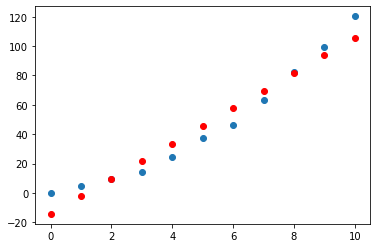

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

X_new = X
y_pred_lr = lin_reg.predict(X_new)

plt.scatter(df['X1'], df['Y'])
# plt.plot(X_new, y_pred, "r-")
plt.scatter(X_new, y_pred_lr, c = 'r')
plt.show()


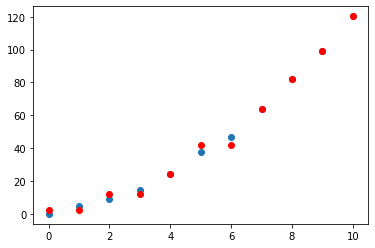

In [7]:
from sklearn.tree import DecisionTreeRegressor
#tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X, y)

X_new = X
y_pred_t = tree_reg.predict(X_new)

plt.scatter(df['X1'], df['Y'])
#plt.plot(X_new, y_pred, "r-")
plt.scatter(X_new, y_pred_t, c = 'r')
plt.show()

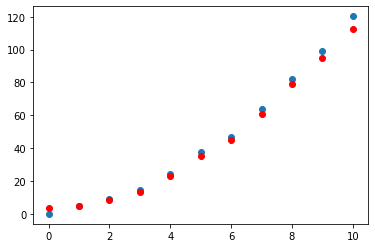

In [8]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1)
rnd_reg.fit(X, y)

X_new = X
y_pred_rf = rnd_reg.predict(X_new)

plt.scatter(df['X1'], df['Y'])
#plt.plot(X_new, y_pred, "r-")
plt.scatter(X_new, y_pred_rf, c = 'r')
plt.show()

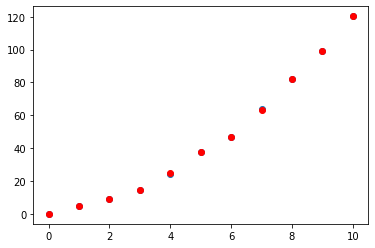

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

X_new = X
y_pred_rf = gbrt.predict(X_new)

plt.scatter(df['X1'], df['Y'])
#plt.plot(X_new, y_pred, "r-")
plt.scatter(X_new, y_pred_rf, c = 'r')
plt.show()

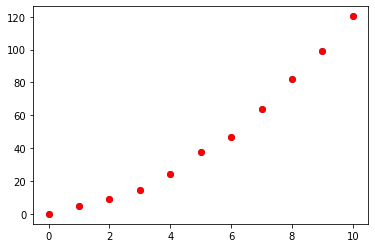

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=100, learning_rate=1.0)
gbrt.fit(X, y)

X_new = X
y_pred_rf = gbrt.predict(X_new)

plt.scatter(df['X1'], df['Y'])
#plt.plot(X_new, y_pred, "r-")
plt.scatter(X_new, y_pred_rf, c = 'r')
plt.show()

In [11]:
# 

In [12]:
# Create a dataset with categorical variables.

In [13]:


data = []
for i in np.linspace(0, 1, num =21):
    #print(i)
    x1 = i
    
    j = np.random.randint(0, 1+1)
    x2 = 0 if j == 0 else 1
#    x2 = 5 if j == 0 else 8
    
    k = np.random.randint(0, 1+1)
    x3 =  0 if k == 0 else 1
#    x3 =  11 if k == 0 else 22
    
    error = np.random.normal(0, 1)

    y = 5*i + 2*j + 3*k  + 0.25*error
    
    data.append([x1, x2, x3, y])
    
cols = ['X1', 'X2cat', 'X3cat', 'Y']
df = pd.DataFrame(data, columns=cols)

print(df)

      X1  X2cat  X3cat         Y
0   0.00      0      1  2.976323
1   0.05      1      1  5.243844
2   0.10      0      1  3.508536
3   0.15      0      0  0.856537
4   0.20      0      1  3.598648
5   0.25      0      1  4.066196
6   0.30      1      1  6.625312
7   0.35      1      1  6.407263
8   0.40      0      0  1.916881
9   0.45      1      1  7.181053
10  0.50      0      0  2.361973
11  0.55      1      0  5.152173
12  0.60      1      1  7.932442
13  0.65      1      0  5.453085
14  0.70      0      1  6.624935
15  0.75      1      1  8.500670
16  0.80      1      1  8.724989
17  0.85      1      1  9.440237
18  0.90      0      1  7.580867
19  0.95      0      1  8.129716
20  1.00      1      0  6.911500


In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [15]:
# Run the 4 machine learning algorithms on the new data.

In [16]:
#Importing required libraries

import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
 
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k)
model = LinearRegression()
 
mse_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    mse = mean_squared_error(pred_values , y_test)
    mse_score.append(mse)
     
avg_mse_score = sum(mse_score)/k
 
print('Linear regression results.')
print('MSE of each fold - {}'.format(mse_score))
print('Avg MSE : {}'.format(avg_mse_score))
print()
linreg_score = avg_mse_score

Linear regression results.
MSE of each fold - [0.037647495791382504, 0.04231783774229363, 0.05433704745850228, 0.06011519976023941, 0.16289091207457135]
Avg MSE : 0.07146169856539783



In [17]:
#Importing required libraries

import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
 
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k)
model = DecisionTreeRegressor(max_depth=3)
 
mse_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    mse = mean_squared_error(pred_values , y_test)
    mse_score.append(mse)
     
avg_mse_score = sum(mse_score)/k
 
print('Decision tree results.')
print('MSE of each fold - {}'.format(mse_score))
print('Avg MSE : {}'.format(avg_mse_score))
print()

dectree_score = avg_mse_score

Decision tree results.
MSE of each fold - [1.1190701931182974, 0.20002659165082065, 1.5360571298153722, 2.312787644285659, 1.7446241093890122]
Avg MSE : 1.3825131336518324



In [18]:
#Importing required libraries

import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Reset random number seed.
np.random.seed(random_seed_value)
 
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k)
model = RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1)
#model = RandomForestRegressor(n_jobs=-1)
 
mse_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    mse = mean_squared_error(pred_values , y_test)
    mse_score.append(mse)
     
avg_mse_score = sum(mse_score)/k
 
print('Random forest results.')
print('MSE of each fold - {}'.format(mse_score))
print('Avg MSE : {}'.format(avg_mse_score))
print()

randf_score = avg_mse_score

Random forest results.
MSE of each fold - [2.3260922684676757, 0.9164518448452452, 0.9391766011730922, 0.5015686559069792, 2.1000012310694216]
Avg MSE : 1.3566581202924826



In [19]:
#Importing required libraries

import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
 
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k)
model = GradientBoostingRegressor(max_depth=3, n_estimators=3, learning_rate=1.0)
 
mse_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    mse = mean_squared_error(pred_values , y_test)
    mse_score.append(mse)
     
avg_mse_score = sum(mse_score)/k
 
print('Gradient boosting regressor results.')
print('MSE of each fold - {}'.format(mse_score))
print('Avg MSE : {}'.format(avg_mse_score))
print()

gradboost_score = avg_mse_score

Gradient boosting regressor results.
MSE of each fold - [2.850290935282545, 0.2991230842160105, 0.9339067562692291, 2.126611169222145, 1.6130954232683337]
Avg MSE : 1.5646054736516528



In [20]:
# Summary of results.
print('Linear regression           :', linreg_score)
print('Decision tree regression    :', dectree_score)
print('Random forest regression    :', randf_score)
print('Gradient boosting regression:', gradboost_score)

Linear regression           : 0.07146169856539783
Decision tree regression    : 1.3825131336518324
Random forest regression    : 1.3566581202924826
Gradient boosting regression: 1.5646054736516528


In [21]:
# Can do a Gridsearch and cross validation in one go!

# Decision Tree Regressor.

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
parameters = {'max_depth':[1,2,3,4]}

grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
 
print('grid_search.best_params_', grid_search.best_params_)
print('grid_search.best_score_', grid_search.best_score_)
print('grid_search.best_estimator', grid_search.best_estimator_)


grid_search.best_params_ {'max_depth': 3}
grid_search.best_score_ -1.3825131336518326
grid_search.best_estimator DecisionTreeRegressor(max_depth=3)


In [22]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [23]:
#print(df)

In [24]:
# Code to divide data into training/validation/test sets.
from sklearn.model_selection import train_test_split

X_train_valid,X_test,y_train_valid,y_test=train_test_split(X,y,shuffle=True, test_size=0.2,random_state=0)
#print(X_train_valid)
#print(y_train_valid)
#print(X_test)
#print(y_test)


In [25]:
# Check whether standardising continuous inputs to a linear regression
# has any effect on predictions.

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print()

X_new = X
y_pred_lr = lin_reg.predict(X_new)

print('y pred lr: ', y_pred_lr)


-0.010701828464195984 [5.1691767  1.97217852 2.89650658]

y pred lr:  [2.88580475 5.1164421  3.40272242 0.76467468 3.91964009 4.17809893
 6.40873628 6.66719511 2.05696885 7.18411278 2.57388652 4.80452388
 7.95948929 5.32144155 6.50422844 8.7348658  8.99332463 9.25178347
 7.53806378 7.79652262 7.13065339]


In [26]:
# Standardise X1 column.
X1_mean = df['X1'].mean()
print(X1_mean)
X1_std = df['X1'].std()
print(X1_std)

for i in range(0, df['X1'].size):
    df.iloc[i, 0] = (df.iloc[i, 0] - X1_mean)/X1_std
    
# print(df['X1'])

# Run linear regression and predict.

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print()

X_new = X
y_pred_lr = lin_reg.predict(X_new)

print('y pred lr (standardised input): ', y_pred_lr)

# Same predictions as unstandardised input.

0.5
0.31024184114977144
2.5738865236060122 [1.6036949  1.97217852 2.89650658]

y pred lr (standardised input):  [2.88580475 5.1164421  3.40272242 0.76467468 3.91964009 4.17809893
 6.40873628 6.66719511 2.05696885 7.18411278 2.57388652 4.80452388
 7.95948929 5.32144155 6.50422844 8.7348658  8.99332463 9.25178347
 7.53806378 7.79652262 7.13065339]


In [27]:
# What if we standardised y also, made predictions
# and then unstandardise the predictions?

Y_mean = df['Y'].mean()
print(Y_mean)
Y_std = df['Y'].std()
print(Y_std)

for i in range(0, df['Y'].size):
    df.iloc[i, 3] = (df.iloc[i, 3] - Y_mean)/Y_std
    
# Run linear regression and predict.

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print()

X_new = X
y_pred_lr = lin_reg.predict(X_new)
print('y pred lr (using standardised output): ', y_pred_lr)

for i in range(0,len(y_pred_lr)):
    y_pred_lr[i] = y_pred_lr[i]*Y_std + Y_mean


print('y pred lr final prdiction: ', y_pred_lr)

# # Same predictions as when unstandardised output is used.

5.675865684502472
2.450084247069708
-1.2660704074182003 [0.65454684 0.80494314 1.18220693]

y pred lr (using standardised output):  [-1.13876122 -0.2283283  -0.92778167 -2.00449883 -0.71680212 -0.61131235
  0.29912057  0.40461034 -1.47704996  0.61558989 -1.26607041 -0.35563749
  0.93205922 -0.14465794  0.33809562  1.24852854  1.35401832  1.45950809
  0.76005472  0.8655445   0.59377048]
y pred lr final prdiction:  [2.88580475 5.1164421  3.40272242 0.76467468 3.91964009 4.17809893
 6.40873628 6.66719511 2.05696885 7.18411278 2.57388652 4.80452388
 7.95948929 5.32144155 6.50422844 8.7348658  8.99332463 9.25178347
 7.53806378 7.79652262 7.13065339]
